In [1]:
import numpy as np
import matplotlib.pyplot as plt

import indices, points
from smolyak import MultivariateSmolyakBarycentricInterpolator as SmolN
from smolyak_jax import MultivariateSmolyakBarycentricInterpolator as SmolJ

%load_ext autoreload
%autoreload 2

In [2]:
import setup, test_smolyak

In [30]:
g = setup.generate_pointsets(10,3)[0] 

k = sorted(np.random.randint(low=1, high=10, size=g.d))
k /= k[0]
d2 = np.random.randint(low=1, high=4)
k2 = np.random.randint(low=1, high=4)
print(f'Testing with d1 = {g.d}, d2 = {d2}, k2 = {k2}')

Testing with d1 = 2, d2 = 2, k2 = 2


In [31]:
[k2]*d2

[2, 2]

In [32]:
ipN.components

In [33]:
ipN = SmolN(g=g, k=k, l=[k2]*d2)
ipJ = SmolJ(g=g, k=k, l=k2, rank=d2, batchsize=1)
f = test_smolyak.generate_test_function_multivariate(ipN)
ipJ.set_F(f=f)

Generating random polynomial as a weighted sum of 1 basis polynomials in 2 dimensions.
Weights:
 [1.] 
Degrees:
 [[0 1]]
Generating random polynomial as a weighted sum of 1 basis polynomials in 2 dimensions.
Weights:
 [1.] 
Degrees:
 [[0 0]]


{(0, 0): {(0, 0): array([0.        , 0.25640789])},
 (0, 1): {(0, 0): array([-1.35550342,  0.25640789]),
  (0, 1): array([1.35550342, 0.25640789])},
 (1, 0): {(0, 0): array([0.        , 0.25640789]),
  (1, 0): array([0.        , 0.25640789])}}

In [34]:
x = g.get_random()
y = f(x)
print(x)
print(y)

[-1.50270251 -0.31943904]
[0.40152232 0.25640789]


In [35]:
ipJ(x)

DeviceArray([[0.40152232, 0.25640789]], dtype=float64)

In [7]:

print(x.shape, y.shape, y_.shape, ipN(x).shape)
#print(f'\t\t ip(x) = {ipJ(x)}, f(x) = {f(x)}')
assert np.isclose(y, y_).all(), \
    f'Assertion failed with\n x = {x}\n f(x) = {y}\n ip(x) = {y_} @ n = {n}'


(2,) (2,) (2, 2) (2,)
(2,) (2,) (2, 2) (2,)
(2,) (2,) (2, 2) (2,)
(2,) (2,) (2, 2) (2,)
(2,) (2,) (2, 2) (2,)


In [11]:
setup

NameError: name 'setup' is not defined

In [2]:
def target(x) :
    if x.ndim == 1 : x = x[None, :]
    assert x.ndim == 2 and x.shape[1] == 2, f'{x.shape}'
    return np.squeeze(np.vstack((x[:,0], 3*x[:,1])).T)

g = points.LejaMulti(domains=[[-10,-5], [-10,-2]])
smoln = SmolN(g=g, k=[1., 1.], l=[2,2])
smolj = SmolJ(g=g, k=[1., 1.], l=2, rank=2)

_ = smoln.set_F(f=target, F={})
_ = smolj.set_F(f=target, F={})

[1.0, 1.0]
2



In [6]:
n_test = 10
x = np.array([g.get_random() for _ in range(n_test)])
y = target(x)
y_n = smoln(x)
y_j = smolj(x)
np.isclose(y, y_n).all(), np.isclose(y, y_j).all()

(True, True)

In [11]:
l = find_suitable_l(k, 100)
ip = MultivariateSmolyakBarycentricInterpolator(g_g, k, [l]*d)
f = ip.gen_test_f()
ip.set_F(f)

x = np.random.random((50,d))

In [12]:
ipj = sj.MultivariateSmolyakBarycentricInterpolator(g_g, k, l, d, f)

In [14]:
ns = np.logspace(np.log(1), np.log(500), num=10, endpoint=True, base=np.e, dtype=int)
print(ns)
ns[0], ns[-1] = 1, 500
print(ns)
print(np.unique(ns))

[  1   1   3   7  15  31  62 125 250 499]
[  1   1   3   7  15  31  62 125 250 500]
[  1   3   7  15  31  62 125 250 500]


In [10]:
%%prun -s cumulative -l 20
y2 = ipj(x)

         3534 function calls (3508 primitive calls) in 0.008 seconds

   Ordered by: cumulative time
   List reduced from 246 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.008    0.008 {built-in method builtins.exec}
        1    0.000    0.000    0.008    0.008 <string>:1(<module>)
        1    0.000    0.000    0.008    0.008 smolyak_jax.py:207(__call__)
      4/2    0.000    0.000    0.006    0.003 traceback_util.py:158(reraise_with_filtered_traceback)
        2    0.000    0.000    0.006    0.003 api.py:1673(vmap_f)
        2    0.000    0.000    0.005    0.002 linear_util.py:153(call_wrapped)
        2    0.000    0.000    0.003    0.002 api.py:595(cache_miss)
        2    0.000    0.000    0.003    0.001 batching.py:364(process_call)
        2    0.000    0.000    0.002    0.001 core.py:2016(bind)
        2    0.000    0.000    0.002    0.001 core.py:714(process_call)
        2    0.000    0

In [9]:
%%prun -s cumulative -l 20
y1 = ip(x)

         42107 function calls in 0.085 seconds

   Ordered by: cumulative time
   List reduced from 22 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.085    0.085 {built-in method builtins.exec}
        1    0.000    0.000    0.085    0.085 <string>:1(<module>)
        1    0.000    0.000    0.085    0.085 smolyak.py:108(__call__)
        1    0.000    0.000    0.085    0.085 smolyak.py:109(<listcomp>)
       50    0.008    0.000    0.085    0.002 smolyak.py:63(__call__)
     1650    0.044    0.000    0.077    0.000 tensorproduct.py:45(__call__)
     2300    0.003    0.000    0.017    0.000 fromnumeric.py:2177(sum)
     2300    0.004    0.000    0.013    0.000 fromnumeric.py:71(_wrapreduction)
     2300    0.001    0.000    0.009    0.000 einsumfunc.py:1009(einsum)
     2300    0.008    0.000    0.008    0.000 {built-in method numpy.core._multiarray_umath.c_einsum}
     2300    0.008    0.000    0.

In [14]:
y1.shape, y2.shape

((10, 1), (10, 1))

In [12]:
for xi,a,b in zip(x,y1,y2) : print(np.max(np.abs(a-b)))

4.3298697960381105e-15
5.88418203051333e-15
4.884981308350689e-15
4.107825191113079e-15
5.551115123125783e-15
6.439293542825908e-15
4.884981308350689e-15
4.884981308350689e-15
5.218048215738236e-15
3.3306690738754696e-15
5.10702591327572e-15
4.551914400963142e-15
3.3306690738754696e-15
4.107825191113079e-15
5.3013149425851225e-15
5.10702591327572e-15
6.217248937900877e-15
5.329070518200751e-15
4.6629367034256575e-15
7.216449660063518e-15
4.440892098500626e-15
3.774758283725532e-15
2.7755575615628914e-15
4.440892098500626e-15
2.6645352591003757e-15
4.218847493575595e-15
2.6645352591003757e-15
6.217248937900877e-15
6.661338147750939e-15
4.218847493575595e-15
3.552713678800501e-15
6.439293542825908e-15
4.218847493575595e-15
3.774758283725532e-15
4.6629367034256575e-15
4.6629367034256575e-15
5.218048215738236e-15
4.440892098500626e-15
4.551914400963142e-15
5.10702591327572e-15
5.551115123125783e-15
3.552713678800501e-15
3.1086244689504383e-15
6.661338147750939e-15
6.8833827526759706e-15
3.

In [42]:
y1.dtype, y2.dtype, x.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [98]:
for o1, o2 in zip(ip.operators, ipj.operators) :
    print(o1.degrees, o2.degrees)

(1, 0) (1, 0)
(1, 1) (1, 1)
(3, 0) (3, 0)


In [102]:
r = 0
for c, o in zip(ip.coefficients, ip.operators) :
    r += c*o(x)
    print(r)

[ 0.0240284   0.06012065 -0.03182546 -0.11825063  0.01701873]
[-3.78962988 -4.46571329 -1.56130497 -0.71204832 -2.51362896]
[-3.8401829  -4.59269528 -1.49560863 -0.48280535 -2.54938032]


In [107]:
r = 0
evalfuncs = {}
for c, data in zip(ipj.coefficients, ipj.data) :
    if len(data) == 1 :
        r += c * data[0]
        print(r)
        continue
    if data[0].shape not in evalfuncs:
        evalfuncs[data[0].shape] = jax.jit(smolyak_jax.evaluate_jax)
    r += c * evalfuncs[data[0].shape](x, *data)
    print(r)

[ 0.02402839  0.06012065 -0.03182546 -0.11825065  0.01701872]
[-3.78963   -4.4657135 -1.5613049 -0.7120483 -2.5136285]
[-3.840183  -4.5926957 -1.4956086 -0.4828053 -2.5493798]


In [106]:
import jax
import smolyak_jax

In [78]:
%%prun -s cumulative -l 20
ipj(x)

         20154 function calls (20150 primitive calls) in 0.065 seconds

   Ordered by: cumulative time
   List reduced from 181 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.065    0.065 {built-in method builtins.exec}
        1    0.000    0.000    0.065    0.065 <string>:1(<module>)
        1    0.038    0.038    0.065    0.065 smolyak_jax.py:100(__call__)
     3558    0.018    0.000    0.021    0.000 lax_numpy.py:4931(deferring_binary_op)
        4    0.000    0.000    0.004    0.001 traceback_util.py:158(reraise_with_filtered_traceback)
        4    0.000    0.000    0.004    0.001 api.py:595(cache_miss)
     3916    0.002    0.000    0.003    0.000 {built-in method builtins.isinstance}
        4    0.000    0.000    0.001    0.000 dispatch.py:875(_execute_compiled)
        4    0.000    0.000    0.001    0.000 dispatch.py:226(_xla_call_impl_lazy)
       76    0.000    0.000    0.001    0.000 

In [77]:
%%prun -s cumulative -l 20
ip(x)

         80677 function calls in 0.144 seconds

   Ordered by: cumulative time
   List reduced from 23 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.144    0.144 {built-in method builtins.exec}
        1    0.000    0.000    0.144    0.144 <string>:1(<module>)
        1    0.009    0.009    0.144    0.144 smolyak.py:63(__call__)
     1780    0.077    0.000    0.135    0.000 tensorproduct.py:45(__call__)
     4012    0.005    0.000    0.026    0.000 fromnumeric.py:2177(sum)
     4012    0.006    0.000    0.020    0.000 fromnumeric.py:71(_wrapreduction)
     4012    0.002    0.000    0.015    0.000 einsumfunc.py:1009(einsum)
     4012    0.013    0.000    0.013    0.000 {built-in method numpy.core._multiarray_umath.c_einsum}
     4012    0.011    0.000    0.011    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     4012    0.004    0.000    0.006    0.000 {method 'join' of 'str' objects}
     1780

In [3]:
l = find_suitable_l(k, 12000)
ip = SmolyakBarycentricInterpolator(g_g, k, l, f)

sizes = {}
for o in ip.operators :
    sizes[o.F.shape] = sizes.get(o.F.shape, 0) + 1

print(sizes)
print(ip.n)

{(): 1, (2,): 142, (2, 2): 731, (3,): 16, (3, 2): 180, (4,): 6, (2, 2, 2): 362, (3, 3): 9, (4, 2): 58, (5,): 3, (2, 2, 2, 2): 35, (3, 2, 2): 129, (5, 2): 21, (6,): 2, (4, 2, 2): 30, (3, 2, 2, 2): 7, (3, 3, 2): 11, (4, 3): 6, (5, 3): 3, (4, 3, 2): 3, (4, 4): 1, (5, 2, 2): 6, (6, 2): 9, (6, 2, 2): 1, (6, 3): 1, (7,): 1, (7, 2): 3, (8,): 1, (8, 2): 1, (9,): 1}
11550


In [4]:
l = find_suitable_l(k, 12000)
ip = SmolyakBarycentricInterpolator(g_g, k, l, f)

sizes = {}
for o in ip.operators :
    sizes[o.F.shape] = sizes.get(o.F.shape, 0) + 1

print(sizes)
print(ip.n)

{(): 1, (2,): 142, (2, 2): 731, (3,): 16, (3, 2): 155, (4,): 6, (2, 3): 25, (2, 2, 2): 362, (3, 3): 9, (4, 2): 54, (5,): 3, (2, 4): 4, (2, 2, 2, 2): 35, (2, 2, 3): 8, (2, 3, 2): 30, (3, 2, 2): 91, (5, 2): 21, (6,): 2, (2, 2, 4): 1, (2, 3, 2, 2): 1, (2, 3, 3): 1, (2, 4, 2): 4, (3, 2, 3): 2, (3, 3, 2): 8, (3, 4): 2, (3, 2, 2, 2): 6, (3, 5): 1, (4, 3): 4, (4, 2, 2): 25, (4, 2, 3): 1, (4, 3, 2): 2, (4, 4): 1, (5, 3): 2, (5, 2, 2): 6, (6, 2): 9, (6, 2, 2): 1, (6, 3): 1, (7,): 1, (7, 2): 3, (8,): 1, (8, 2): 1, (9,): 1}
11550


In [10]:
for x in it.product(*ip.operators[342].nodes) : print(x)

(-0.7071067811865475, -0.7071067811865475)
(-0.7071067811865475, 0.7071067811865475)
(0.7071067811865475, -0.7071067811865475)
(0.7071067811865475, 0.7071067811865475)


In [4]:
%%prun -s cumulative
ip(np.random.random((3000,d)))

         77120 function calls in 0.598 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.598    0.598 {built-in method builtins.exec}
        1    0.000    0.000    0.598    0.598 <string>:1(<module>)
        1    0.012    0.012    0.595    0.595 smolyak.py:63(__call__)
     1780    0.262    0.000    0.583    0.000 tensorproduct.py:71(__call__)
     4012    0.006    0.000    0.169    0.000 fromnumeric.py:2177(sum)
     4012    0.006    0.000    0.163    0.000 fromnumeric.py:71(_wrapreduction)
     4012    0.153    0.000    0.153    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     4012    0.002    0.000    0.139    0.000 einsumfunc.py:1009(einsum)
     4012    0.137    0.000    0.137    0.000 {built-in method numpy.core._multiarray_umath.c_einsum}
     4012    0.004    0.000    0.007    0.000 {method 'join' of 'str' objects}
        1    0.003    0.003    0.003    0.003 {method 'random' 

In [4]:
meta = {}
for k, _ in sizes.items() :
    if len(k) not in meta :
        meta[len(k)] = k
    else :
        meta[len(k)] = tuple(max(k1,k2) for k1,k2 in zip(k, meta[len(k)]))
meta

{0: (), 1: (9,), 2: (8, 4), 3: (6, 3, 2), 4: (3, 2, 2, 2)}

In [28]:
F = np.random.random((5,4,4,3))

x = np.random.random((250, F.ndim))
res = F
norm = np.zeros(x.shape[0])
for i in range(F.ndim) :
    print(i, res.shape, res.ndim, end=' - ')
    b = np.random.random((250, F.shape[i]))
    if i == 0 :
        subscripts = ''.join(chr(107 + i) for i in range(res.ndim - 1))
        res = np.einsum(f'ij,j{subscripts}->i{subscripts}', b, res)
    else :
        subscripts = ''.join(chr(107 + i) for i in range(res.ndim - 2))
        res = np.einsum(f'ij,ij{subscripts}->i{subscripts}', b, res)
    print(res.shape, res.ndim, subscripts)
    norm += np.sum(b, axis=1)
(res / norm).shape

0 (5, 4, 4, 3) 4 - (250, 4, 4, 3) 4 klm
1 (250, 4, 4, 3) 4 - (250, 4, 3) 3 kl
2 (250, 4, 3) 3 - (250, 3) 2 k
3 (250, 3) 2 - (250,) 1 


(250,)

In [28]:
ip = SmolyakBarycentricInterpolator(g_g, k, l, f)

old : 0.8 - 0.83
new : 0.58 - 0.61

In [47]:
%%prun -s cumulative
ip(np.random.random((3000,d)))

         77120 function calls in 0.621 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.621    0.621 {built-in method builtins.exec}
        1    0.000    0.000    0.621    0.621 <string>:1(<module>)
        1    0.014    0.014    0.613    0.613 smolyak.py:63(__call__)
     1780    0.267    0.000    0.599    0.000 tensorproduct.py:108(__call__)
     4012    0.005    0.000    0.176    0.000 fromnumeric.py:2177(sum)
     4012    0.006    0.000    0.170    0.000 fromnumeric.py:71(_wrapreduction)
     4012    0.160    0.000    0.160    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     4012    0.002    0.000    0.142    0.000 einsumfunc.py:1009(einsum)
     4012    0.140    0.000    0.140    0.000 {built-in method numpy.core._multiarray_umath.c_einsum}
        1    0.008    0.008    0.008    0.008 {method 'random' of 'numpy.random.mtrand.RandomState' objects}
     4012    0.004    0.000    0

In [6]:
%%prun -s cumulative
ip(np.random.random((3000,d)))

         108080 function calls in 0.674 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.674    0.674 {built-in method builtins.exec}
        1    0.000    0.000    0.674    0.674 <string>:1(<module>)
        1    0.016    0.016    0.667    0.667 smolyak.py:63(__call__)
     2445    0.082    0.000    0.651    0.000 tensorproduct.py:70(__call__)
     4789    0.219    0.000    0.220    0.000 tensorproduct.py:18(b)
     4789    0.006    0.000    0.197    0.000 fromnumeric.py:2177(sum)
     4789    0.007    0.000    0.190    0.000 fromnumeric.py:71(_wrapreduction)
     4789    0.179    0.000    0.179    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     4789    0.003    0.000    0.137    0.000 einsumfunc.py:1009(einsum)
     4789    0.134    0.000    0.134    0.000 {built-in method numpy.core._multiarray_umath.c_einsum}
        1    0.007    0.007    0.007    0.007 {method 'random' of 'numpy

In [4]:
%%prun -s cumulative
ip(np.random.random((3000,d)))

         165548 function calls in 0.938 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.938    0.938 {built-in method builtins.exec}
        1    0.000    0.000    0.938    0.938 <string>:1(<module>)
        1    0.017    0.017    0.930    0.930 smolyak.py:63(__call__)
     2445    0.088    0.000    0.913    0.000 tensorproduct.py:70(__call__)
     4789    0.270    0.000    0.472    0.000 tensorproduct.py:18(b)
    14367    0.020    0.000    0.381    0.000 fromnumeric.py:71(_wrapreduction)
    14367    0.352    0.000    0.352    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     9578    0.008    0.000    0.199    0.000 fromnumeric.py:2322(any)
     4789    0.006    0.000    0.196    0.000 fromnumeric.py:2177(sum)
     4789    0.003    0.000    0.140    0.000 einsumfunc.py:1009(einsum)
     4789    0.137    0.000    0.137    0.000 {built-in method numpy.core._multiarray_umath.c_einsum}
 

In [57]:
ip_leja = SmolyakBarycentricInterpolator(LejaMulti(d=d), k, 2.1, f)

In [47]:
i = indexset_sparse(lambda j : k[j], 2.1, cutoff=len(k))

i

[{}, {0: 1}, {0: 2}]

In [ ]:
err = np.zeros((len(ips),n))
for i, ip in enumerate(ips) :
    err[i] = mc_mse_estimate(f, ip, g, n)
nevals = [s.n for s in ips]

full = np.inf
for i, ip in enumerate(ips) :
    if not (0 in ip.get_max_degrees()) : full = ip.n; break
full_i = i

pickle.dump({'err' : err, 'nevals' : nevals, 'full' : (full_i, full)}, open(fname, 'wb'))
    
return err, nevals, (full_i, full)

1000 993 5.49370740625
1000 993 4.86984546875
1000 1002 4.60188828125
1000 999 6.06135441875
1000 1004 5.45486390625
1000 1000 5.19267028125
1000 1000 6.45879569375
1000 1007 5.86757609375
1000 1001 5.60538246875
1000 993 6.753865731249999
1000 1001 6.16974749375
1000 1000 5.906419593749999
1000 1000 6.988717393749999
1000 1003 6.404599156250001
1000 1001 6.15168198125


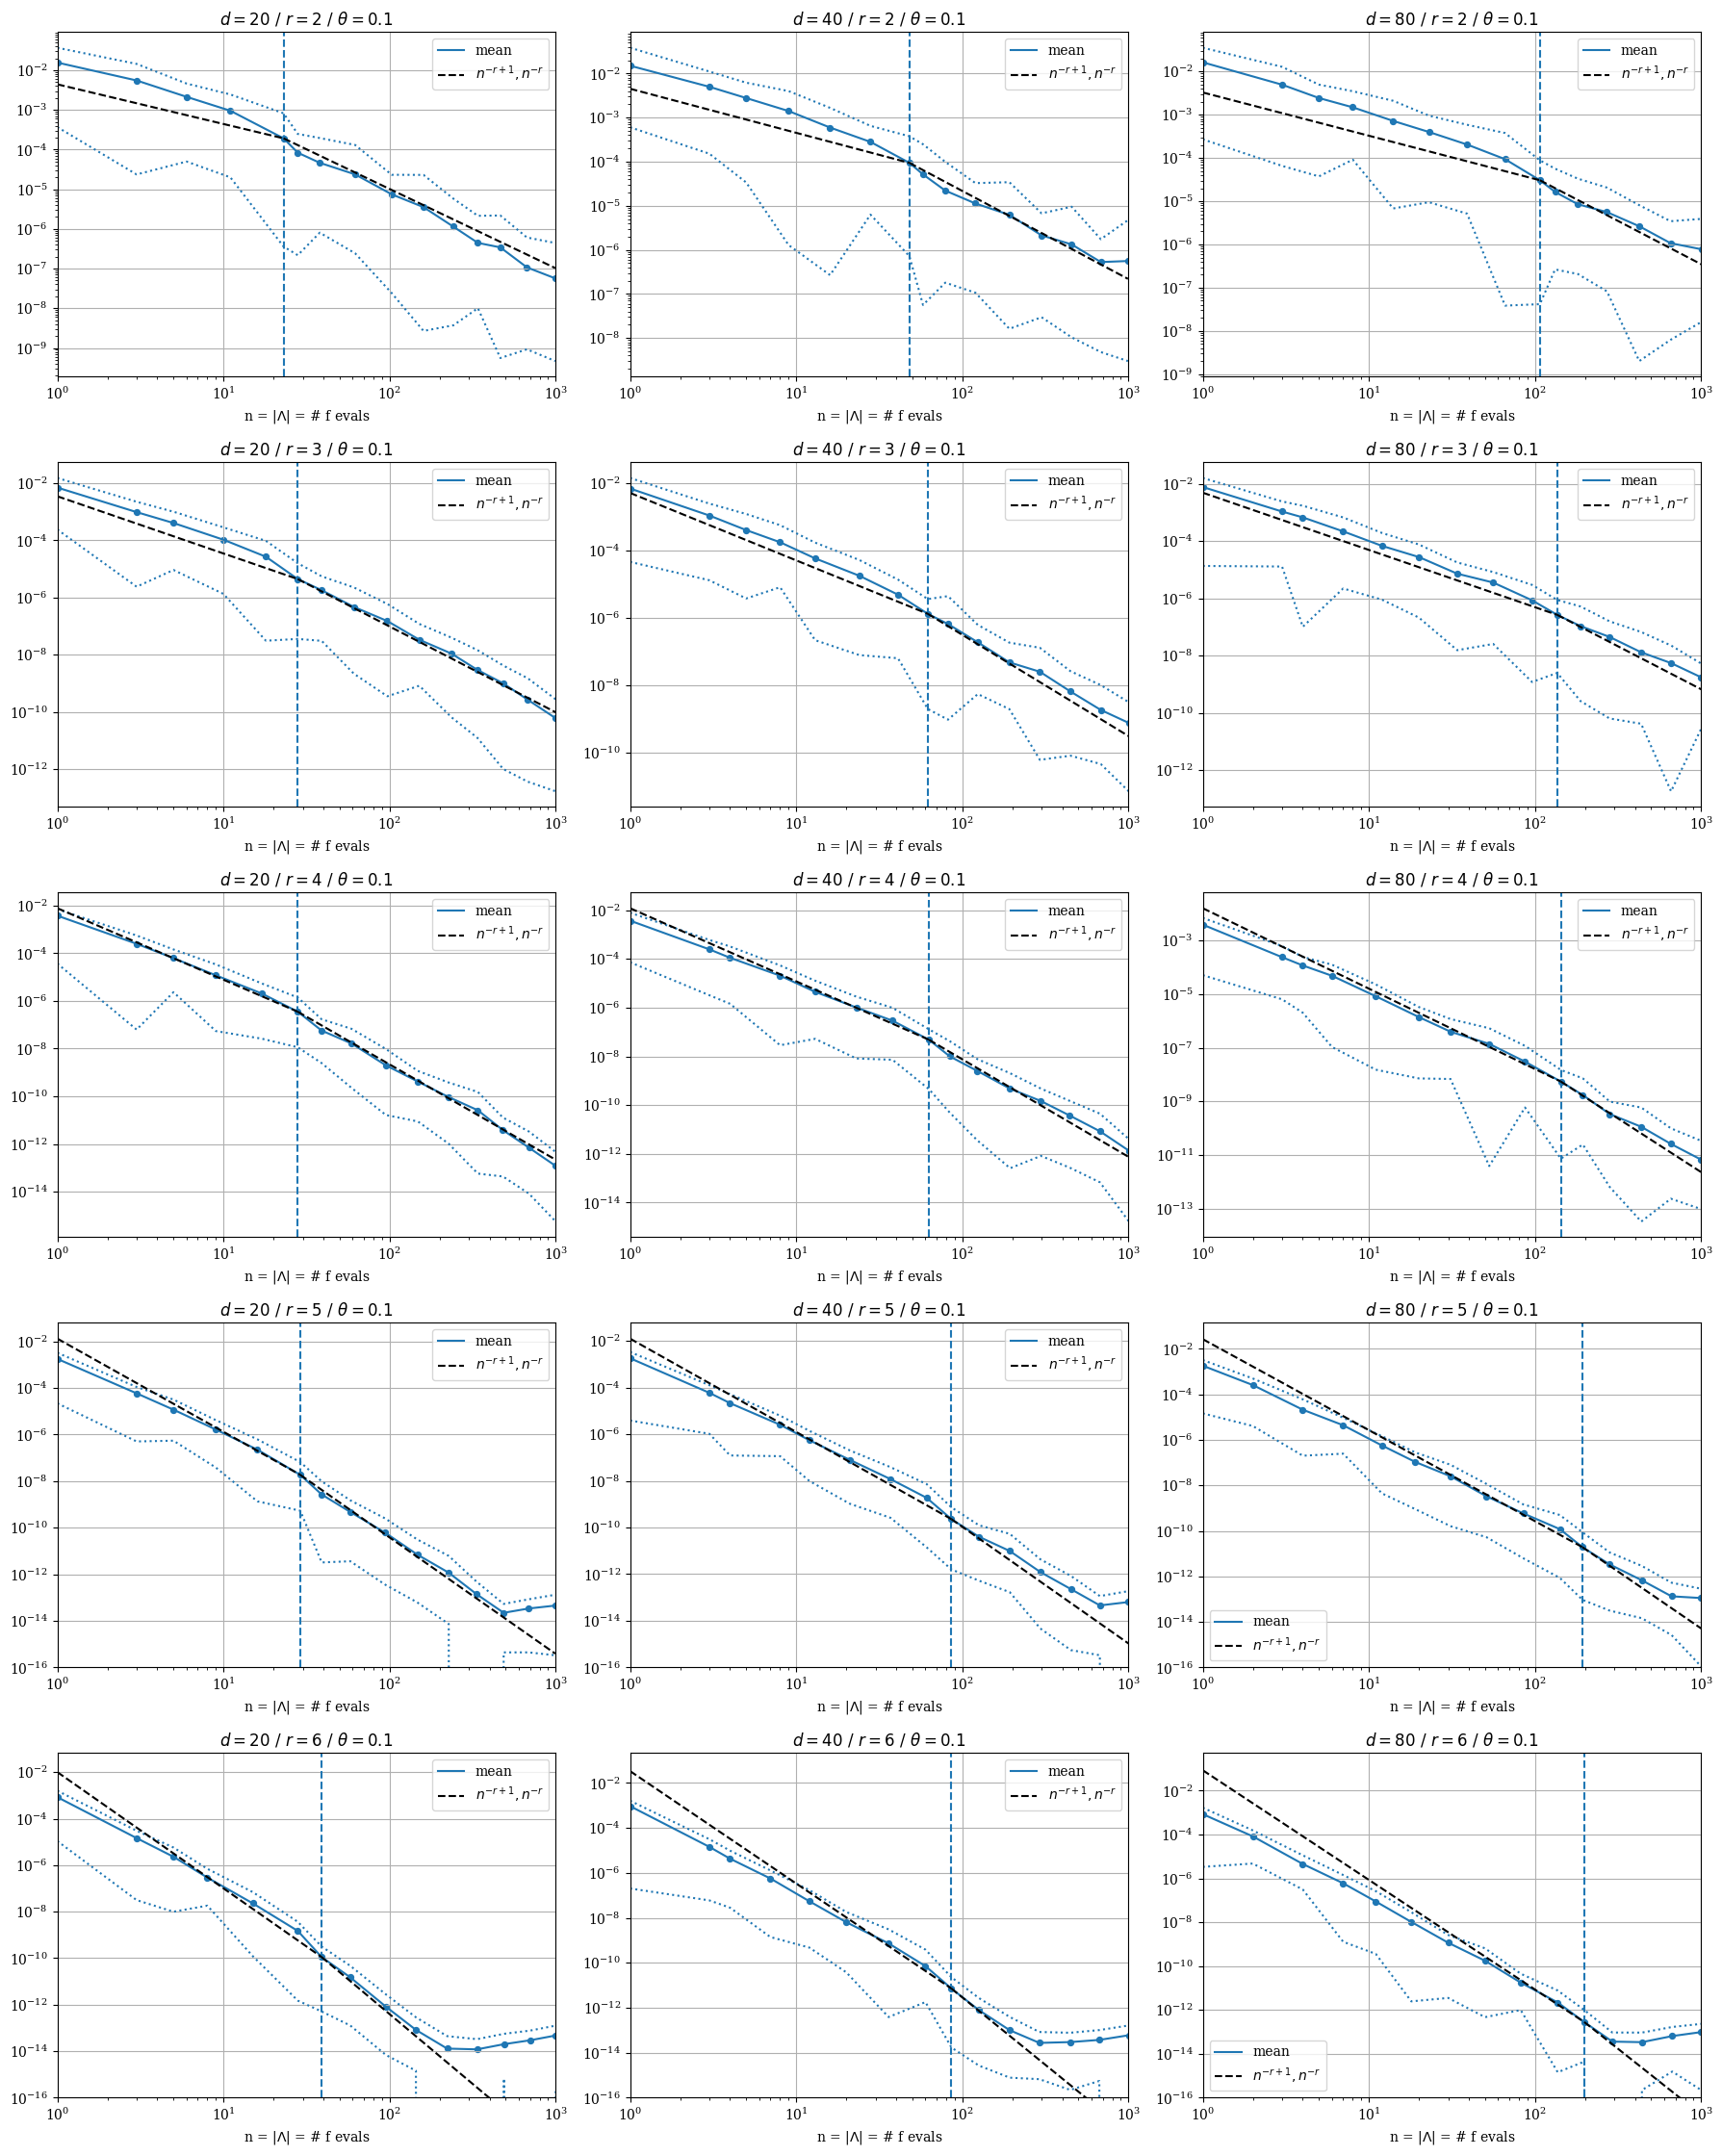

In [66]:
def mc_mse_estimate(f, ip, gen, n=500) :
    error = np.zeros((n,))
    norm = 0
    for j in range(n) :
        x = gen.get_random()
        fx = f(x)
        error[j] = (fx - ip(x))**2
        norm += fx**2
    return error * n / norm

def compute_mse_conv(d, r, theta, k, nodes, fname, n=100) :
    if os.path.exists(fname):
        res = pickle.load(open(fname, 'rb'))
        return res['err'], res['nevals'], res['full']

    else :
        f = lambda x : target_f(x, theta, r)
        if nodes == 'leja' :
            g = LejaMulti(d=d)
            max_l = find_suitable_l(k, 1000)
        else :
            g = GaussHermiteMulti(np.zeros((d,)), np.ones((d,)))
            max_l = find_suitable_l(k, 100)
        ips = [SmolyakBarycentricInterpolator(g, k, l, f) for l in np.linspace(1,max_l,15)]
        err = np.zeros((len(ips),n))
        for i, ip in enumerate(ips) :
            err[i] = mc_mse_estimate(f, ip, g, n)
        nevals = [s.n for s in ips]
        
        full = np.inf
        for i, ip in enumerate(ips) :
            if not (0 in ip.get_max_degrees()) : full = ip.n; break
        full_i = i

        pickle.dump({'err' : err, 'nevals' : nevals, 'full' : (full_i, full)}, open(fname, 'wb'))
            
    return err, nevals, (full_i, full)
    
def plot_mse_conv(e, n, full, *, d, r, theta, ax=None, show_r=True, label='mean') :
    if ax is None : ax = plt.figure(figsize=(16, 6)).add_subplot(111)
    ax.set_xlabel(r'n = $|\Lambda|$ = # f evals')
    ax.set_title(f'$d = {d} \ /\  r = {r} \ /\  \\theta = {theta}$')
        
    mean = np.sqrt([np.mean(e[i]) for i in range(len(n))])
    mmin = np.sqrt([np.min(e[i]) for i in range(len(n))])
    mmax = np.sqrt([np.max(e[i]) for i in range(len(n))])
        
    ax.loglog(n, mean, label=label)
    color = ax.get_lines()[-1].get_color()
    ax.loglog(n, mmin, color, linestyle=':')
    ax.loglog(n, mmax, color, linestyle=':')
    ax.scatter(n, mean, s=18, color=color)

    if full[1] != np.inf :
        ax.axvline(x=full[1], color=ax.get_lines()[-1].get_color(), linestyle='--')
    
    if show_r :
        nevals1 = [ni for ni in n if ni <= full[1]]
        nevals2 = [ni for ni in n if ni >= full[1]]
        ax.loglog(nevals2, mean[full[0]] * full[1]**r * np.array([ni**float(-r) for ni in nevals2]), 'k--', label=r'$n^{-r+1}, n^{-r}$')
        ax.loglog(nevals1, mean[full[0]] * full[1]**(r-1) * np.array([ni**float(-r+1) for ni in nevals1]), 'k--')
    
    return ax

def compute_and_plot(*, d, r, theta, nodes, ax=None, show_r=True) :
    k  = [np.log((ki+2)**(r)/theta) for ki in range(d)]
    k  = [ki/k[0] for ki in k]
    fname = f'results/{nodes}_d={d}_r={r}_t={theta}.pkl'
    err, nevals, full = compute_mse_conv(d, r, theta, k, nodes, fname)
    ax = plot_mse_conv(err, nevals, full, d=d, r=r, theta=theta, ax=ax, show_r=show_r)
    
def compute_and_plot_multi(*, d, r, theta, nodes='leja', save=True):
    n_cols = len(d)
    n_rows = len(r)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 6 * (6/8) * n_rows), squeeze=False)
    for (r_val, d_val), ax in zip(list(itertools.product(r, d)), axs.flatten()):
        compute_and_plot(d=d_val, r=r_val, theta=theta, nodes=nodes, ax=ax)
        ymin, ymax = ax.get_ylim()
        ax.set_ylim([max(ymin, 1e-16), ymax]); ax.set_xlim([1,1000]); ax.grid(); ax.legend();
    fig.tight_layout()
    if save : plt.savefig(f'results/{nodes}_t={theta}.pdf', format='pdf')

compute_and_plot_multi(d=[20,40,80], r=[2,3,4,5,6], theta=.1, nodes='leja', save=True)

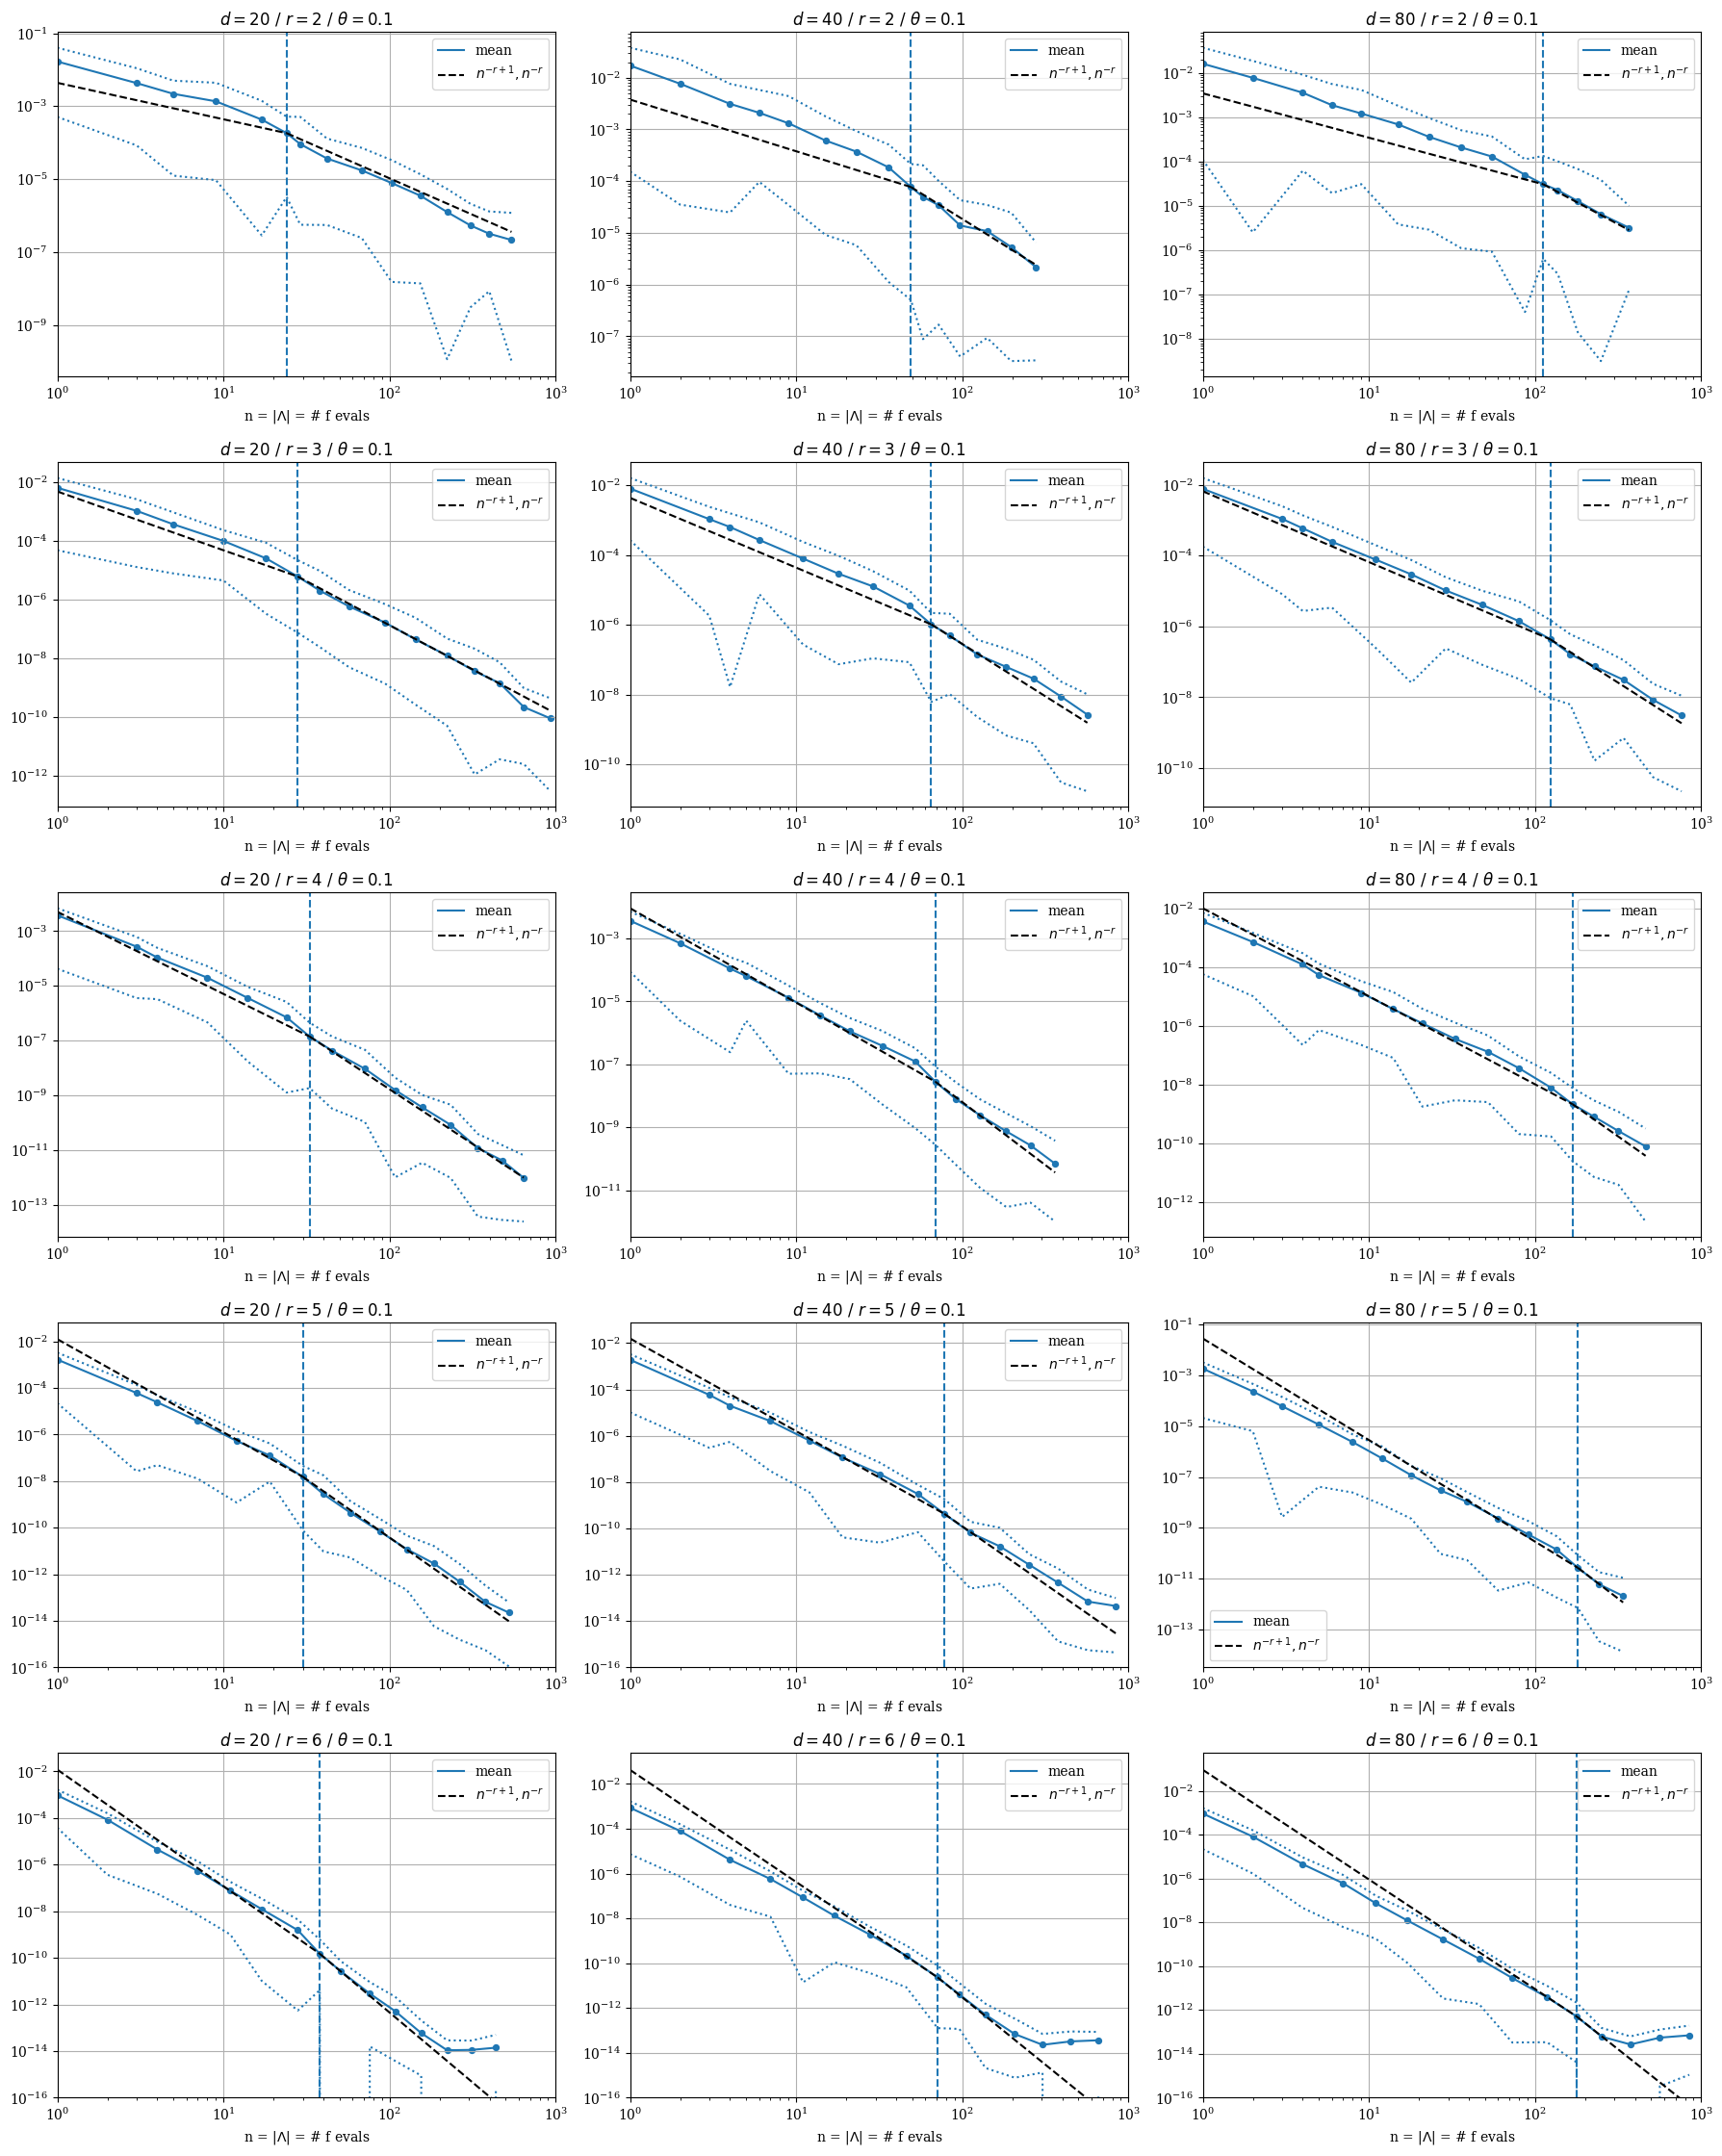

In [3]:
compute_and_plot_multi(d=[20,40,80], r=[2,3,4,5,6], theta=.1)

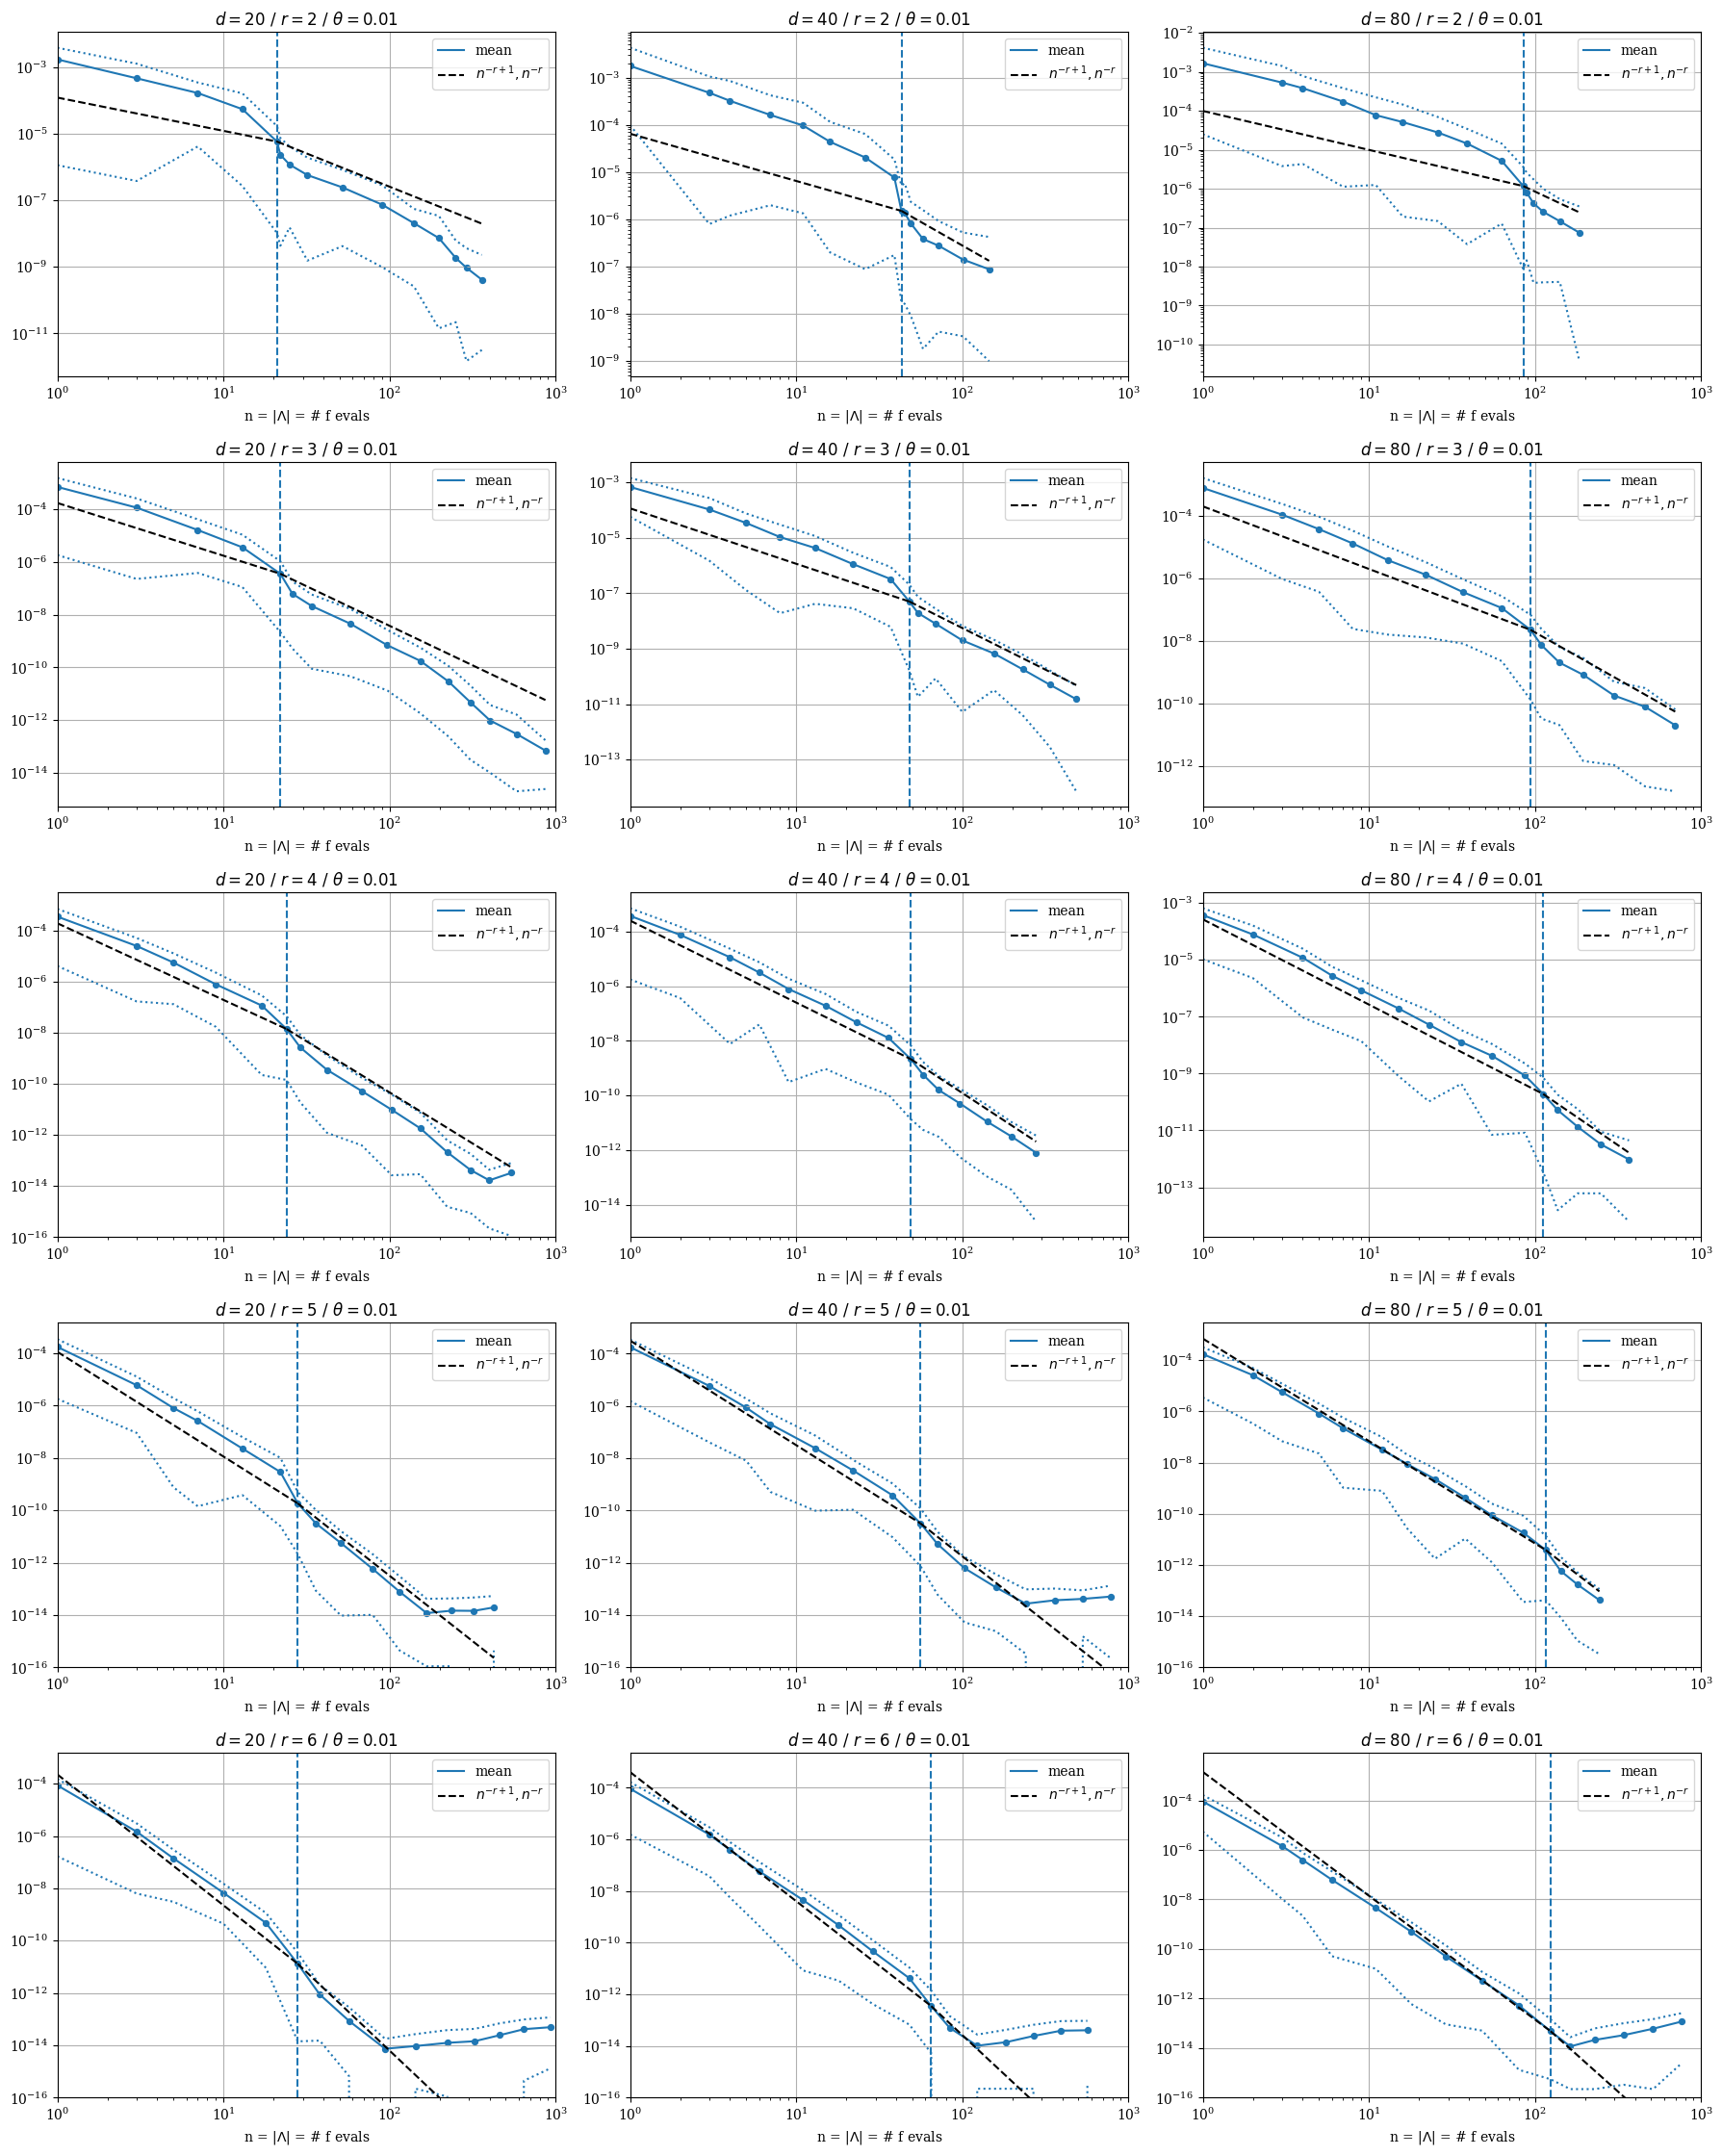

In [4]:
compute_and_plot_multi(d=[20,40,80], r=[2,3,4,5,6], theta=.01)

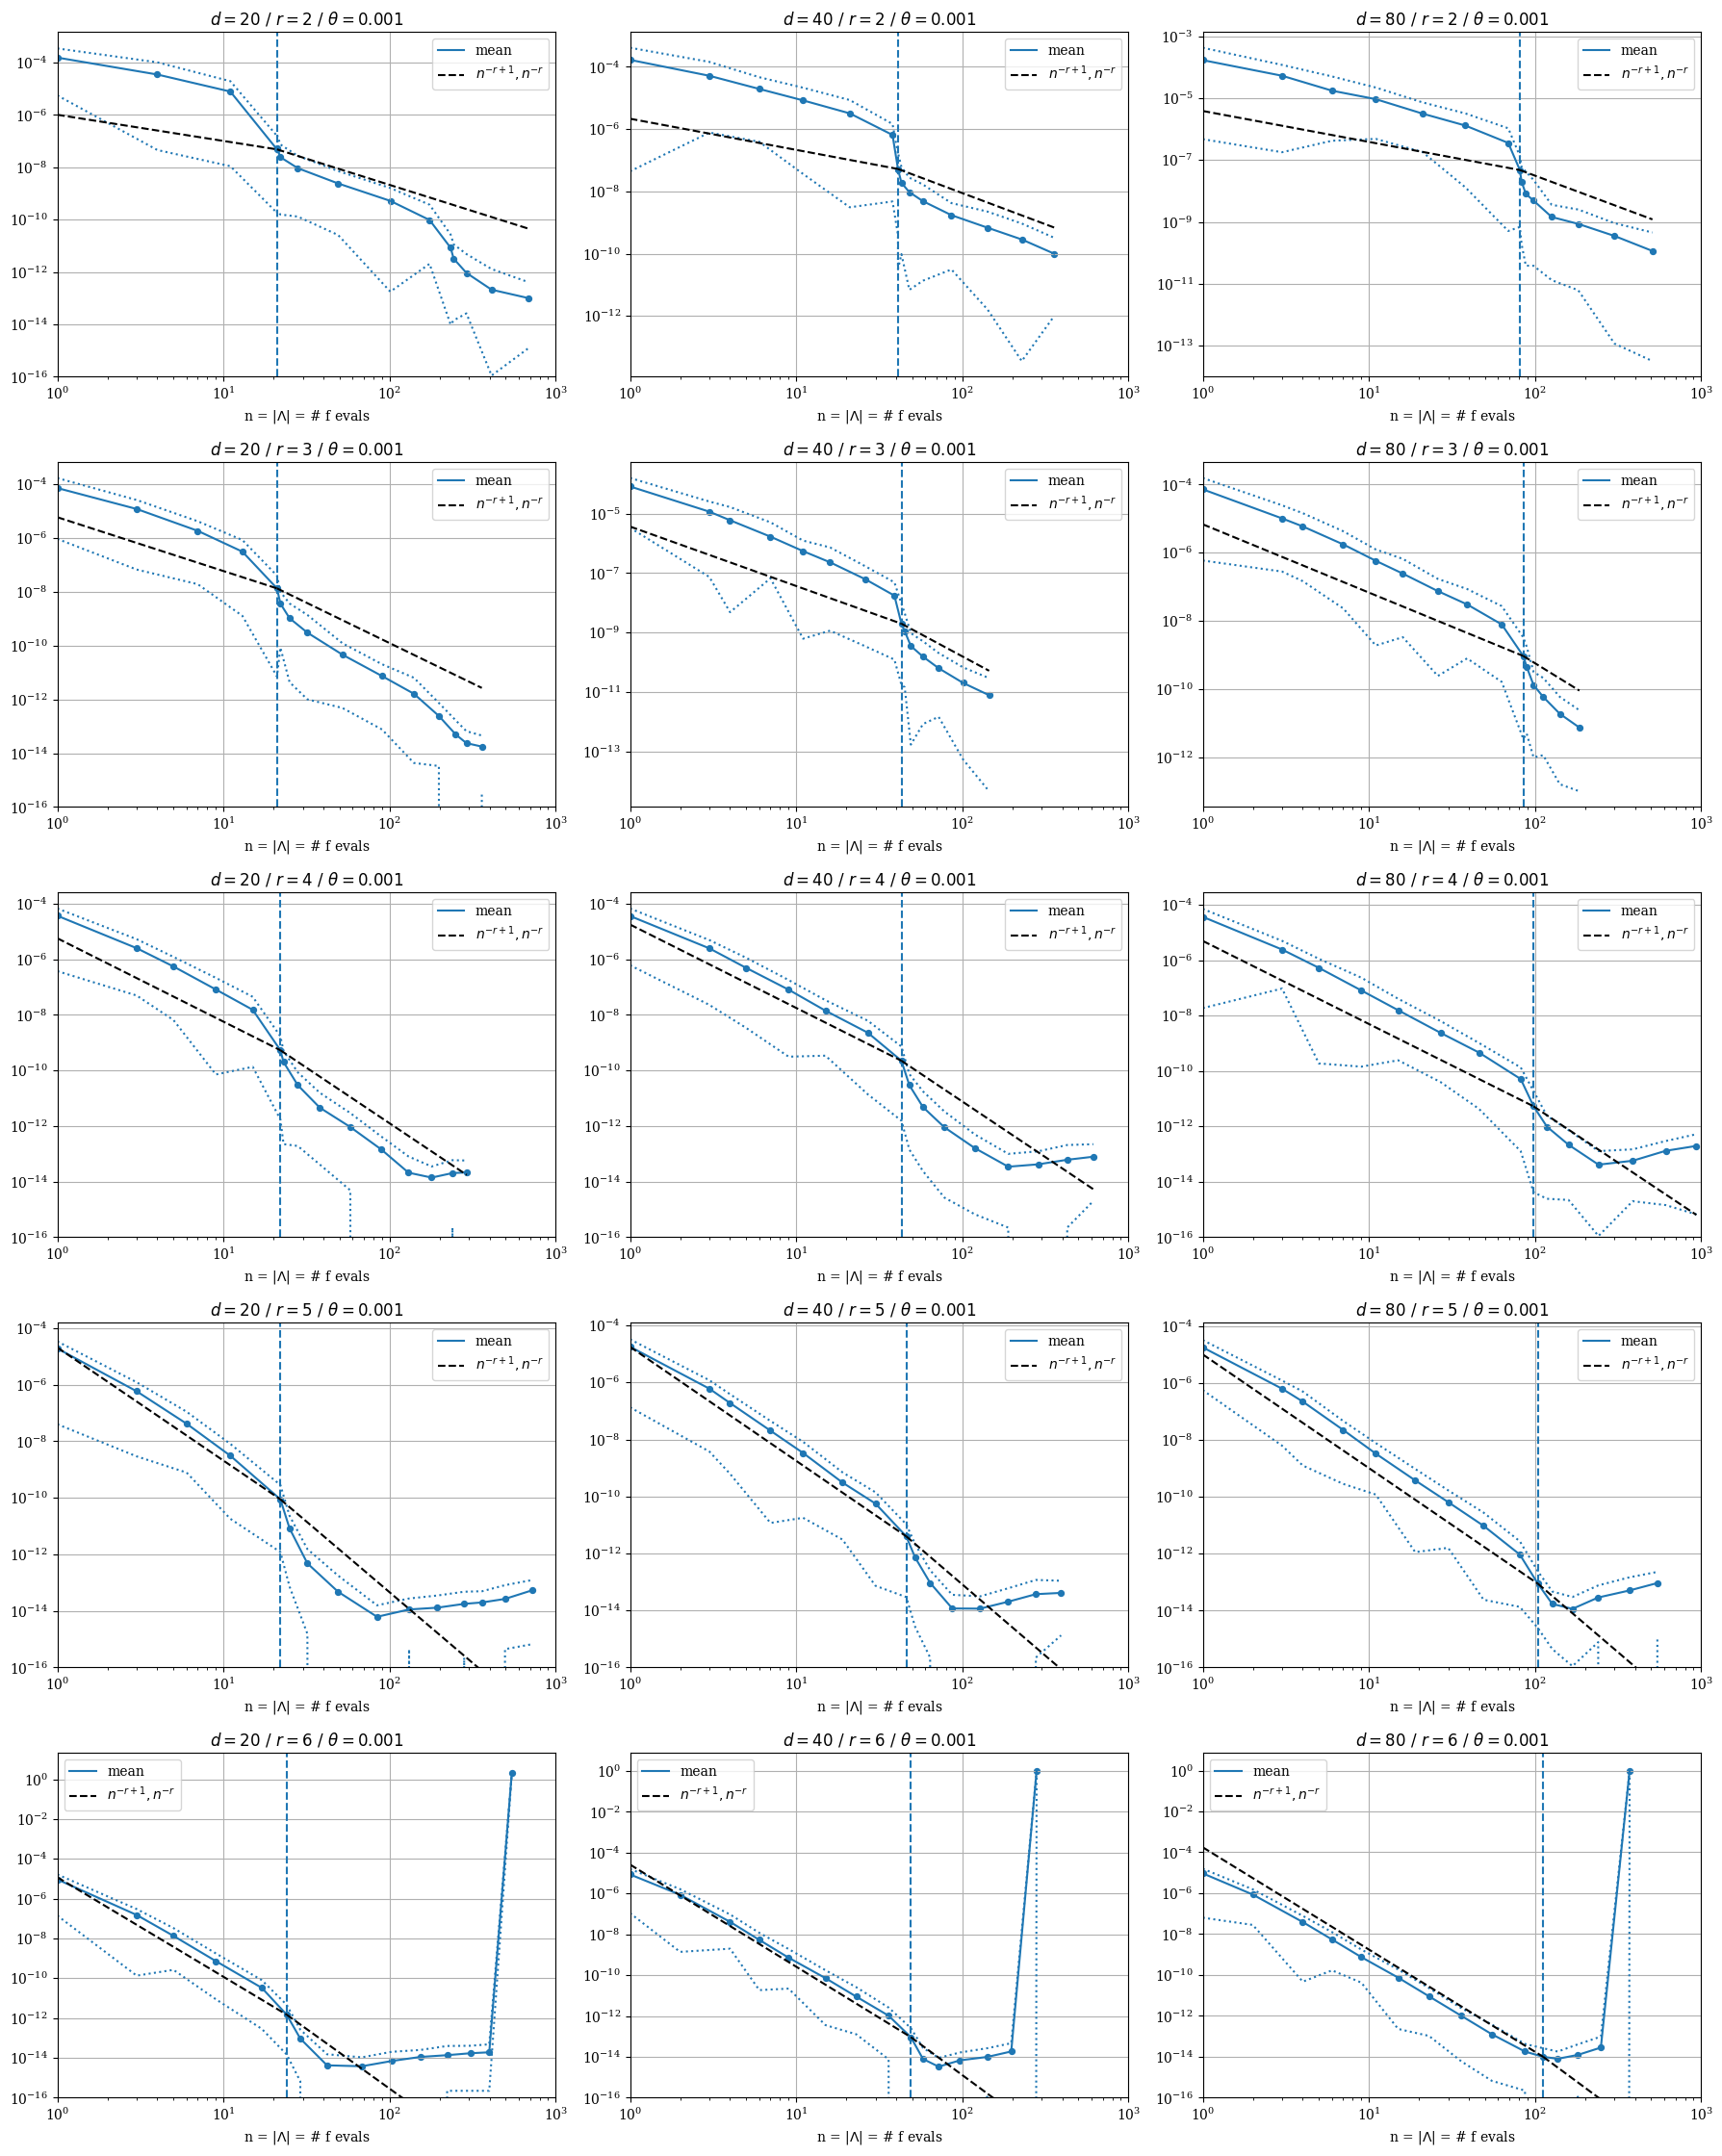

In [5]:
compute_and_plot_multi(d=[20,40,80], r=[2,3,4,5,6], theta=.001)

# Test target function $f : [-1,1]^d \to \mathbb{R}$
given by
$$ f(\boldsymbol{x}) = \frac{1}{1 + \Theta \sum_{j=1}^d (j+1)^{-r} x_j} $$
for some $\Theta \in (0,1)$ and $r\ge1$.

# Smolyak operator $I_{\Lambda_\ell}$ 
with $\Lambda_\ell := \{\nu : \sum_{j=1}^d \log(\theta (j+1)^r) \nu_j < \ell\}$

# MC estimate of the $L_2$ error
$$\sqrt{\frac{\sum_{i=1}^m (f(\boldsymbol{x}_i)-I_{\Lambda_\ell}[f](\boldsymbol{x}_i))^2}{\sum_{i=1}^m f(\boldsymbol{x}_i)^2}}$$
with $\boldsymbol{x}_i \sim \mathcal{U}([-1,1]^d)$

### **Notes**

We have that 
$$ 
    \partial^\boldsymbol{\nu} f(\boldsymbol{x}) = \frac{\boldsymbol{\nu}! (-\Theta)^{||\boldsymbol{\nu}||_1}}{\left(1 + \Theta \sum_{j=1}^d j^{-r} x_j\right)^{-1-||\boldsymbol{\nu}||_1}} \prod_{j=1}^d j^{-r \nu_j}.
$$

With $\frac{(\Theta)^{||\boldsymbol{\nu}||_1}}{\left(1 + \Theta \sum_{j=1}^d j^{-r} x_j\right)^{-1-||\boldsymbol{\nu}||_1}} < 1$ for $\Theta$ sufficiently small it follows that
$$ 
    ||f-I_{\boldsymbol{\nu}}[f]||_\infty 
    \le \frac{2^d}{\boldsymbol{\nu}!} ||\partial^\boldsymbol{\nu} f||_\infty 
    \le 2^d \prod_{j=1}^d j^{-r \nu_j}.
$$
Thus
$$
    ||\Delta_{\boldsymbol{\nu}}[f]||_\infty \le C_d \prod_{j=1}^d j^{-r \nu_j}
$$

# Approximation result

In [25]:
def multivariate_linspace(point1, point2, n) :
    steps = np.linspace(0, 1, n)
    return [point1 * (1 - step) + point2 * step for step in steps]

def generate_random_points(d, n):
    point1 = np.random.uniform(-1, 1, d)
    point2 = np.random.uniform(-1, 1, d)

    dim = np.random.randint(d)
    point1[dim] = -1
    print(point1)

    dim = np.random.randint(d)
    point2[dim] = 1
    print(point2)

    return multivariate_linspace(point1, point2, n)

[-0.51495395  0.27640394 -1.         -0.66962761 -0.05571029]
[ 0.13250182 -0.58314724 -0.919079    1.         -0.91163337]


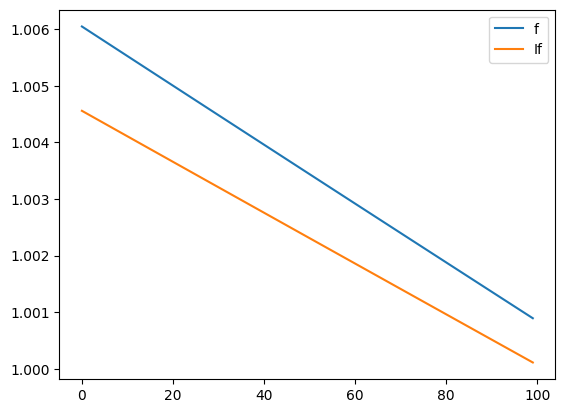

In [98]:
x = np.array(generate_random_points(d, 100))
y_f = np.array([f(xi) for xi in x])
y_If = np.array([ips[10](xi) for xi in x])

plt.plot(y_f, label='f')
plt.plot(y_If, label='If')
plt.legend();